<a href="https://colab.research.google.com/github/michaelhasey/Archi_Vision/blob/main/Vacancy_Image_Classification_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A. Initialization**

In [ ]:
# NOTE

# The below code was learned and adapted from various tutorials for and methods suggested by Fastai, an online platform
# that makes building, using and manipulating deep learning algorithms easier and more accessible to cs and deep learning beginners.
# As my background is architecture rather than computer science, I find platforms like fastai a great way to becomes
# acquainted with and exposed to deep learning concepts and techniques.
# More info can be found here:  https://www.fast.ai/
# the following tutorial was used to help guide the construction of this classification model: 
# https://docs.fast.ai/tutorial.vision.html#Single-label-classification

#### **0. Identify Target**

In [ ]:
# identify folder directory that contains images
# to be predicted vacant or occupied

target = 'Vacancy_Prediction'

#### **1. Mount Google Drive**

In [ ]:
# This was originally run on google colab pro due to its t4 / P100 GPU access features.
# In addition, all imports and below listed functionality works.
# Nonetheless, the below code can be run locally as well.
# Ensure that you have also downloaded the training dataset and locate it properly via the below prompts

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **2. Import Libraries**

In [ ]:
import os # provides functions for interacting with the operating system
import json # file format for array data types
import requests # enables easy access to http (google java library for accessing things online)
import glob # to display images after classification


#### **3. Install CNN Packages**

In [ ]:
# Install torchvision (torch vision is pytorch's computer vision library consisting of  datasets, 
# model architectures, and common image transformations for computer vision)

In [ ]:
pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 19kB/s 
     |████████████████████████████████| 4.0MB 66.3MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [ ]:
# Install imgaug. Imgaug is a library for image augmentation in machine learning experiments.

In [ ]:
pip install imgaug==0.2.5


     |████████████████████████████████| 563kB 5.8MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp36-none-any.whl size=561440 sha256=fabe3e68ba743a84f54af00f4479159601e95ff85a664021102ad47f9412cda4
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
# Import fastai to build image classification model
# Fastai was used as it simplifies training fast and effective neural networks using current best practices.
# More info can be found here:  https://www.fast.ai/
# the following tutorial was used to help guide the construction of this classification model: 
# https://docs.fast.ai/tutorial.vision.html#Single-label-classification

from fastai.vision import *
from fastai.metrics import accuracy

#### **4. Set directory**

In [ ]:
# change directory to match one originally entered in code, if necessary

if os.getcwd() != '/content/drive/My Drive/Colab Notebooks/HumAI_TP_Mhasey':
    os.chdir('/content/drive/My Drive/Colab Notebooks/HumAI_TP_Mhasey')
    print("Directory changed.")

Directory changed.


# **B. Load pre-trained CNN model**

> Indented block



#### **0. Shuffle Files Around into logical order


In [ ]:
# below code was done at my end due to weights and pickled model
# being placed in wrong folder.

# do not use below code unless you need to shuffle things around in a similar way

import shutil

# move pickled model into "pickled prediction model" folder
shutil.move("Data/1_Vacancy_Prediction_Training_Data/pickle_weights.pkl", \
            "Models/1_Vacancy_Prediction/training_model_pickled/pickle_weights.pkl")

# move weights into weights folder
shutil.move("Data/1_Vacancy_Prediction_Training_Data/models/weights_1.pth", \
            "Models/1_Vacancy_Prediction/training_model_weights/weights_1.pth")

# delete old models folder
os.rmdir("Data/1_Vacancy_Prediction_Training_Data/models")


FileNotFoundError: ignored

#### **1. Load folder categories**

In [ ]:
# load training data labels in order to properly label prediction images

labels = os.listdir("Data/1_Vacancy_Prediction_Training_Data")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
      print("{}, {} files".format(label, len(os.listdir("Data/1_Vacancy_Prediction_Training_Data/"+label))))

No. of labels: 2
-----------------
Occupied, 100 files
Vacant, 100 files


#### **3. Create learner object**

In [ ]:
# create a learner used for transfer learning

learner = load_learner('./Models/1_Vacancy_Prediction/training_model_pickled/')

# **C. Make predictions & sort into folders**

#### **2. Create folders for prediction outputs**

In [ ]:
# this is where predicted output images will be placed
# as per below, predicted images will be placed in folders
# corresponding with the name of their predicted class.  

os.mkdir(f'Predictions/{target}')

for elem in labels:
  os.mkdir(f'Predictions/{target}/{elem}')

#### **3. Test print prediction image**

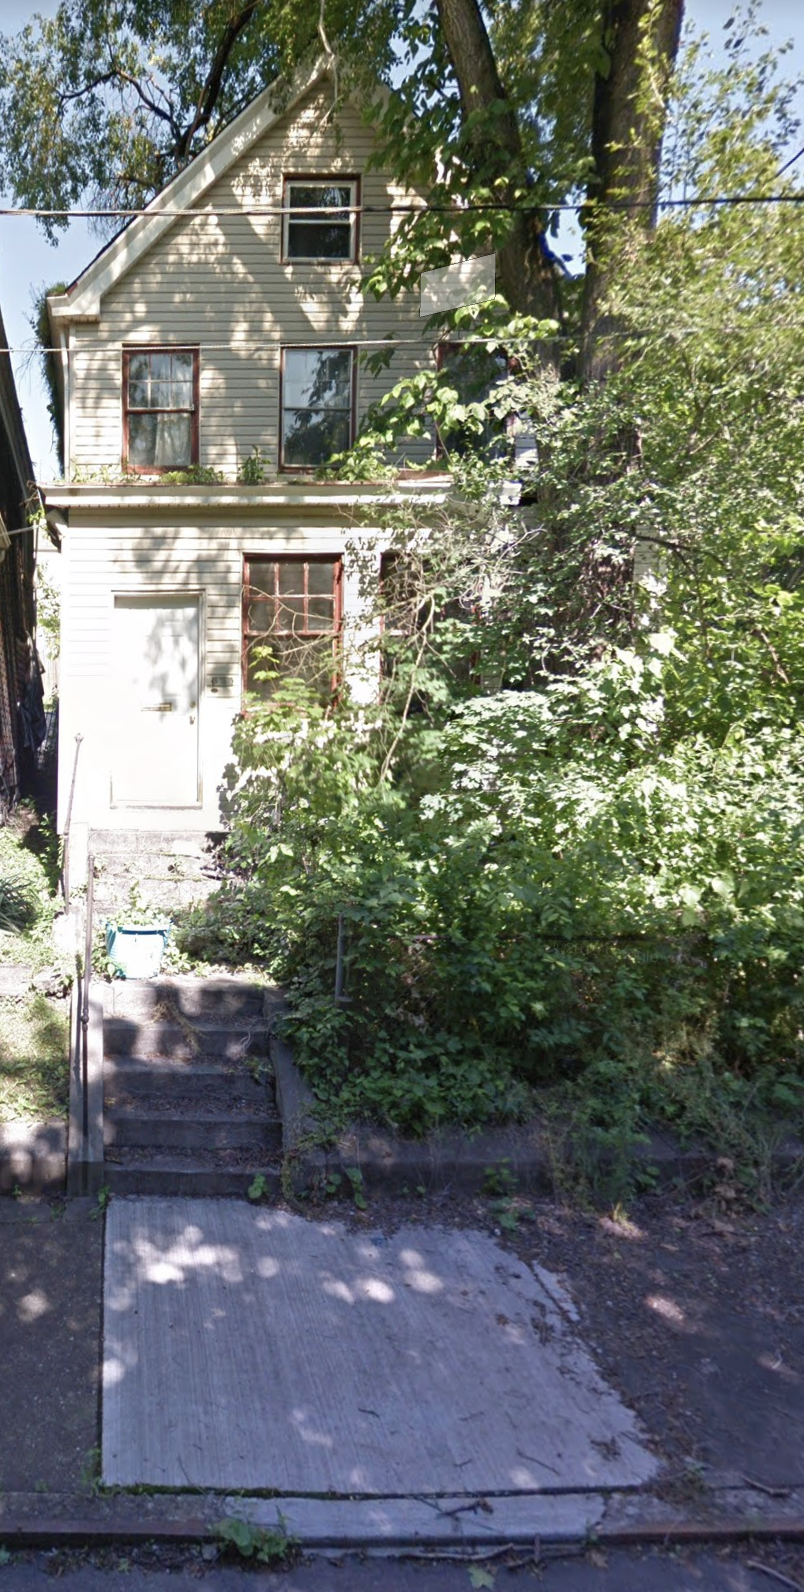

In [ ]:
import glob

img = open_image(glob.glob(f'Data/1_Vacancy_Prediction_Prediction_Data/*.png')[1])
img

#### **4. Predict image class & save to corresponding folder**

In [ ]:
# create save_img function
# this specifies the parameters of the save image.

def save_img(img, fn):
  x = np.minimum(np.maximum(image2np(img.data*255), 0), 255).astype(np.uint8)
  PIL.Image.fromarray(x).save(fn)

In [ ]:
# make predictions, list predictions below, then label image as predicted class
# and place in coresponding folder

counter = 0

for elem in glob.glob(f'Data/1_Vacancy_Prediction_Prediction_Data/*.png'):

  try:
    img2 = open_image(elem)

    pred_class,pred_idx,outputs = learner.predict(img2)
    print(str(pred_class))

    counter += 1

    if str(pred_class) == 'Occupied':
        save_img(img2, f'Predictions/{target}/Occupied/Occupied_{counter}.jpg')
    if str(pred_class) == 'Vacant':
        save_img(img2, f'Predictions/{target}/Vacant/Vacant_{counter}.jpg')
   


  except: 
    pass

Occupied
Vacant
Vacant
Occupied
Vacant
Vacant
Vacant
Occupied
Occupied
Occupied
Occupied
Occupied
Occupied
Occupied
Occupied
Vacant
Vacant
Occupied
Vacant
Vacant
Occupied
Occupied
Occupied
Occupied
Occupied
Vacant
Occupied
Vacant
Vacant
Vacant
Occupied
Vacant
Occupied
